# Masking

This notebook visually validates the cross-validation methods implemented in `dtd/data/killifish.py`

In [2]:
%load_ext autoreload
%autoreload 2

import itertools
import numpy as onp

import matplotlib as mpl
import matplotlib.colors as mplc
import matplotlib.pyplot as plt
import seaborn as sns

import dtd
import dtd.data.killifish

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
# construct dummy data
onp_rng = onp.random.default_rng(seed=42)

unique_names = ['a', 'b', 'c', 'd', 'e', 'f', 'g']
n_days = [onp_rng.integers(1, 20).item() for _ in unique_names]

print("(unique_name, n_days): ", list(zip(unique_names, n_days)))

# Generate a name label for each entry
names = list(itertools.chain.from_iterable([[name,]*n for name, n in zip(unique_names, n_days)]))
print(f"{names=}")

# Specify final batch shape
batch_shape = (sum(n_days), 10)
print(f"{batch_shape=}")

(unique_name, n_days):  [('a', 2), ('b', 15), ('c', 13), ('d', 9), ('e', 9), ('f', 17), ('g', 2)]
names=['a', 'a', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'g', 'g']
batch_shape=(67, 10)


## Speckled masking with subject hold-out

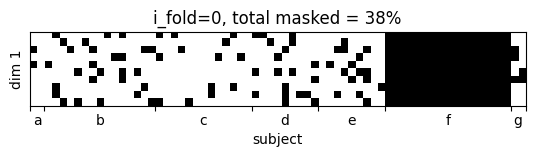

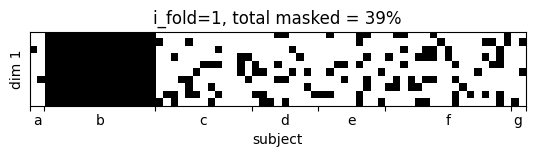

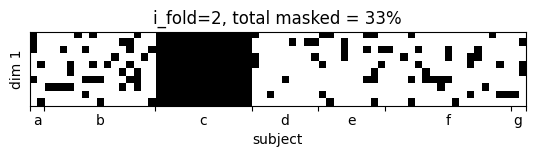

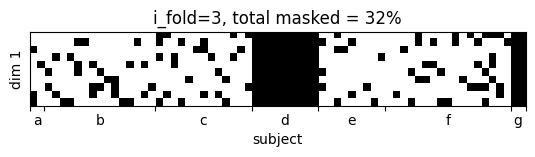

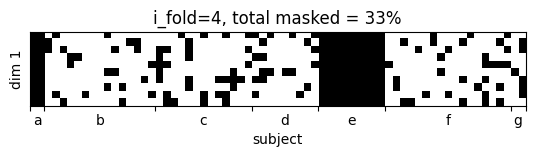

In [30]:
cv = dtd.data.killifish.generate_cross_validation_mask(
    seed=42, val_frac=0.2, test_frac=0.2, shape=batch_shape, groups=names
)
for i_fold, masks in enumerate(cv):
    mask = masks['val_mask'] & masks['test_mask']
    plt.imshow(mask.T, cmap='Greys_r')
    plt.ylabel('dim 1')
    plt.xlabel('subject')

    plt.yticks([])

    # Draw ticks at start and stop of each subject, label center span
    split_indices = onp.concatenate([[0,], onp.cumsum(n_days)])
    split_centers = 0.5 * (split_indices[1:] - split_indices[:-1]) + split_indices[:-1] - 0.5
    plt.xticks(split_indices-0.5, labels=[])
    plt.xticks(split_centers, labels=unique_names, minor=True)
    plt.tick_params(axis='x', which='minor', bottom=False)  # don't show minor ticks

    plt.title(f"{i_fold=}, total masked = {(mask.size-mask.sum())/mask.size*100:.0f}%")
    plt.show()